In [2]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings("ignore")

In [16]:
# falsos positivos - features
datafp = pd.read_csv("../data/processed/falsospositivos.csv")
datafp.drop(columns=["Date"], inplace=True)

# verdadeiros positivos
datavp = pd.read_csv("../data/processed/verdadeirospostivos.csv")
datavp.drop(columns=["Date"], inplace=True)

In [17]:
statsfp = datafp.describe().T[["mean", "std", "min", "max"]]
statsvp = datavp.describe().T[["mean", "std", "min", "max"]]

comparison = pd.concat([
    statsfp.add_prefix("FP_"),
    statsvp.add_prefix("TP_")
], axis=1)

comparison['Diff_Mean'] = comparison['FP_mean'] - comparison['TP_mean']

In [19]:
comparison = comparison.sort_values("Diff_Mean", ascending=False)

comparison

,FP_mean,FP_std,FP_min,FP_max,TP_mean,TP_std,TP_min,TP_max,Diff_Mean
close_vs_high_lag5,0.959964,0.038375,0.776504,1.000000,0.943056,0.046329,0.707215,1.000000,0.016908
return_lag10,0.021367,0.046333,-0.153057,0.148413,0.004937,0.046250,-0.132500,0.164337,0.016430
close_vs_high_lag6,0.959460,0.038823,0.801418,1.000000,0.943132,0.046182,0.721542,1.000000,0.016328
return_lag11,0.020696,0.045833,-0.091786,0.148413,0.004990,0.048516,-0.166411,0.164337,0.015706
close_vs_high_lag3,0.959119,0.037134,0.780151,1.000000,0.943625,0.047539,0.695494,1.000000,0.015494
return_lag12,0.020590,0.045154,-0.104250,0.148413,0.005324,0.049082,-0.153057,0.164337,0.015267
close_vs_high_lag7,0.957959,0.039960,0.801418,1.000000,0.943464,0.046717,0.703048,1.000000,0.014494
return_lag9,0.020099,0.046104,-0.153057,0.148413,0.005823,0.046554,-0.132500,0.164337,0.014276
return_lag8,0.019888,0.047655,-0.153057,0.148413,0.006615,0.045633,-0.127880,0.164337,0.013273
close_vs_high_lag10,0.955259,0.040456,0.801418,1.000000,0.942577,0.047941,0.712425,1.000000,0.012682


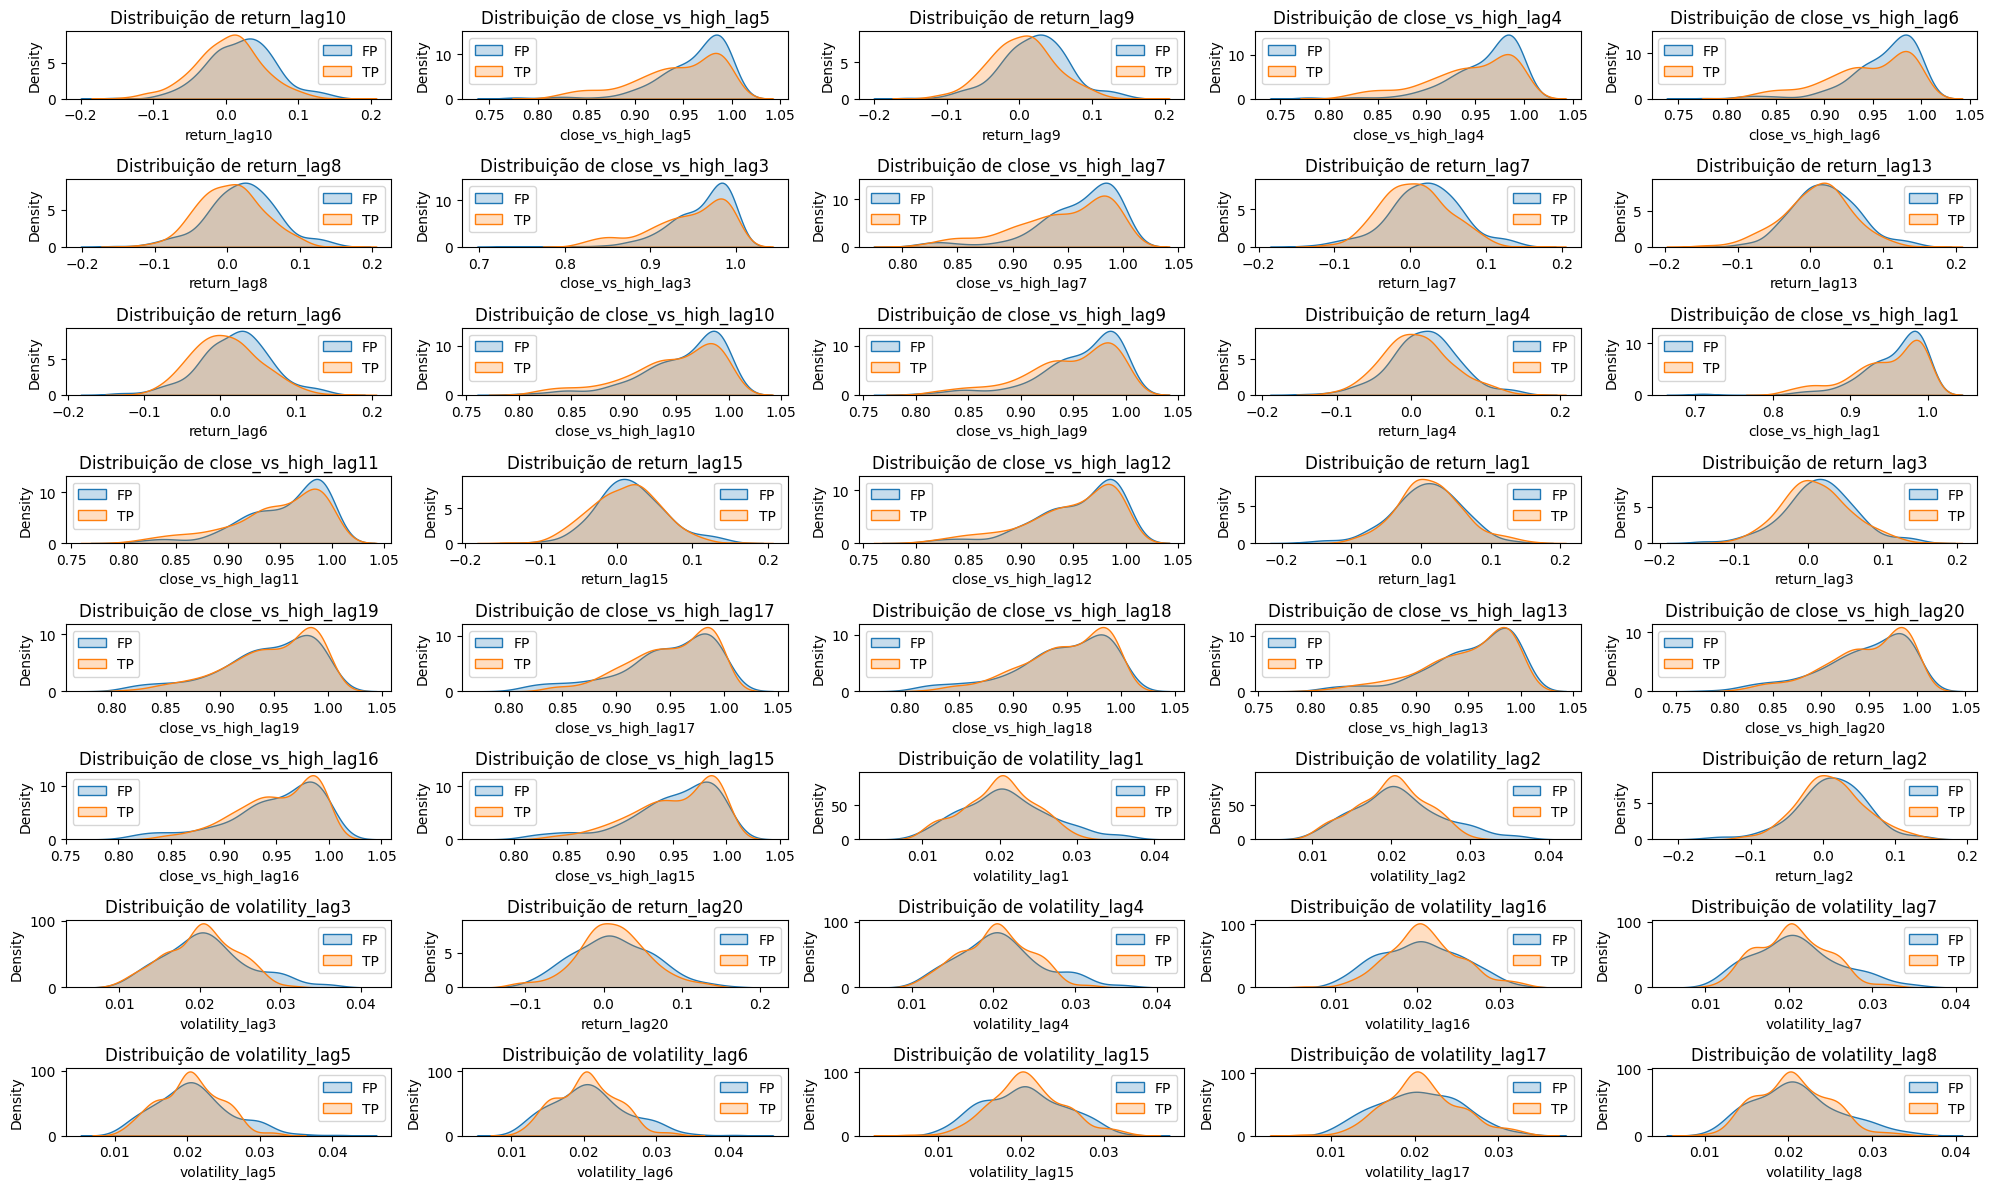

In [7]:
top_features = comparison['Diff_Mean'].abs().nlargest(40).index

plt.figure(figsize=(20, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(8, 5, i)
    sns.kdeplot(datafp[feature], label='FP', fill=True)
    sns.kdeplot(datavp[feature], label='TP', fill=True)
    plt.title(f'Distribuição de {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

In [11]:
comparison_filter = comparison[comparison['Diff_Mean'] < 0.005]


comparison_filter

,FP_mean,FP_std,FP_min,FP_max,TP_mean,TP_std,TP_min,TP_max,Diff_Mean
return_lag1,0.007880,0.049672,-0.166411,0.139229,0.012977,0.046979,-0.109495,0.164337,-0.005097
close_vs_high_lag19,0.944291,0.044532,0.816434,1.000000,0.948465,0.041407,0.813575,1.000000,-0.004175
close_vs_high_lag17,0.946441,0.045222,0.816434,1.000000,0.950474,0.038417,0.838161,1.000000,-0.004033
close_vs_high_lag18,0.945359,0.044782,0.816434,1.000000,0.949328,0.039735,0.817729,1.000000,-0.003969
close_vs_high_lag20,0.943971,0.046324,0.786890,1.000000,0.946692,0.042880,0.813575,1.000000,-0.002721
close_vs_high_lag16,0.948207,0.044921,0.809367,1.000000,0.950872,0.037783,0.838161,1.000000,-0.002666
close_vs_high_lag15,0.949089,0.043331,0.809367,1.000000,0.951276,0.039548,0.831388,1.000000,-0.002186
return_lag2,0.010773,0.049473,-0.166411,0.143354,0.011673,0.046423,-0.110529,0.148413,-0.000901
volatility_lag16,0.020351,0.004946,0.010286,0.033022,0.020879,0.004451,0.006275,0.033032,-0.000529
volatility_lag15,0.020366,0.004868,0.010286,0.033032,0.020806,0.004370,0.006275,0.032746,-0.000440


## Balaceamento - Target

In [5]:
df_treino = pd.read_csv("../data/raw/treino.csv")
df_teste = pd.read_csv("../data/raw/teste.csv")

print(f"Treino: {df_treino["target"].value_counts(normalize=True)}")
print(f"Teste: {df_teste["target"].value_counts(normalize=True)}")



Treino: target
1    0.522528
0    0.477472
Name: proportion, dtype: float64
Teste: target
1    0.588101
0    0.411899
Name: proportion, dtype: float64


## Análise dos retonos

In [6]:
dataret = pd.read_csv("../data/raw/dados_brutos.csv")

dataret["future_return"] = dataret["Close"].pct_change(10).shift(-10)

In [8]:
def analisar_distribuicao_retornos(df, nome_conjunto):
    """Analisa detalhadamente a distribuição dos retornos futuros."""
    retornos = df["future_return"].dropna()
    
    print(f"\n📊 ANÁLISE DOS RETORNOS FUTUROS ({nome_conjunto})")
    print("="*50)
    
    # Estatísticas descritivas
    print("\n🔍 Estatísticas Descritivas:")
    print(retornos.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))
    
    # Teste de normalidade
    from scipy.stats import shapiro
    stat, p = shapiro(retornos)
    print(f"\n📝 Teste de Normalidade (Shapiro-Wilk): p-value = {p:.4f}")
    print("👉 Os retornos NÃO são normalmente distribuídos" if p < 0.05 else "👉 Os retornos podem ser normais")
    
    # Plotagem
    plt.figure(figsize=(15, 10))
    
    # Histograma + Densidade
    plt.subplot(2, 2, 1)
    sns.histplot(retornos, bins=100, kde=True)
    plt.axvline(0, color='r', linestyle='--', alpha=0.5)
    plt.axvline(retornos.mean(), color='g', linestyle='-', alpha=0.8)
    plt.title(f"Distribuição dos Retornos Futuros\n({nome_conjunto})")
    plt.xlabel("Retorno Futuro (10 dias)")
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(x=retornos)
    plt.title("Boxplot dos Retornos")
    plt.xlabel("Retorno Futuro")
    
    # QQ-Plot
    plt.subplot(2, 2, 3)
    from scipy.stats import probplot
    probplot(retornos, plot=plt)
    plt.title("Q-Q Plot vs. Distribuição Normal")
    
    # Distribuição Acumulada
    plt.subplot(2, 2, 4)
    sns.ecdfplot(retornos)
    plt.axvline(0, color='r', linestyle='--', alpha=0.5)
    plt.title("Distribuição Acumulada (ECDF)")
    plt.xlabel("Retorno Futuro")
    
    plt.tight_layout()
    plt.savefig(f"../data/image/distribuicao_retornos_{nome_conjunto.lower()}.png")
    plt.close()
    
    # Análise do threshold zero
    acima_zero = 100 * (retornos > 0).mean()
    print(f"\n🎯 Proporção de retornos > 0: {acima_zero:.2f}%")
    
    # Sugestão automática de threshold
    threshold_otimo = retornos.quantile(0.55)  # Exemplo: percentil 55
    print(f"💡 Sugestão de threshold alternativo: {threshold_otimo:.4f} (percentil 55)")
    
    return retornos

retornos_treino = analisar_distribuicao_retornos(df_treino, "TREINO")


📊 ANÁLISE DOS RETORNOS FUTUROS (TREINO)

🔍 Estatísticas Descritivas:
count    3307.000000
mean        0.005381
std         0.089215
min        -0.376019
1%         -0.229971
5%         -0.128532
25%        -0.045926
50%         0.005405
75%         0.056572
95%         0.139215
99%         0.246864
max         0.661191
Name: future_return, dtype: float64

📝 Teste de Normalidade (Shapiro-Wilk): p-value = 0.0000
👉 Os retornos NÃO são normalmente distribuídos

🎯 Proporção de retornos > 0: 52.25%
💡 Sugestão de threshold alternativo: 0.0143 (percentil 55)


In [11]:
def calcular_threshold_otimo(retornos, custo_transacao=0.001):
    """Calcula threshold que maximiza o retorno líquido esperado"""
    thresholds = np.linspace(retornos.min(), retornos.max(), 100)
    resultados = []
    
    for th in thresholds:
        retorno_medio = retornos[retornos > th].mean() - custo_transacao
        freq_sinais = (retornos > th).mean()
        resultados.append(retorno_medio * freq_sinais)
    
    idx_otimo = np.argmax(resultados)
    return thresholds[idx_otimo]

threshold_otimo = calcular_threshold_otimo(retornos_treino)
print(f"🎯 Threshold ótimo baseado em retorno esperado: {threshold_otimo:.4f}")

🎯 Threshold ótimo baseado em retorno esperado: 0.6612


In [12]:
def analisar_sensibilidade(retornos):
    thresholds = np.linspace(-0.05, 0.05, 50)
    proporcoes = []
    
    for th in thresholds:
        proporcoes.append((retornos > th).mean())
    
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, proporcoes, marker='o')
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel("Threshold")
    plt.ylabel("Proporção de Sinais Positivos")
    plt.title("Sensibilidade da Proporção de Sinais ao Threshold")
    plt.grid(True)
    plt.savefig("../data/image/sensibilidade_threshold.png")
    plt.close()

analisar_sensibilidade(retornos_treino)

In [13]:
datayh = pd.read_csv("../data/raw/dados_brutos.csv")
datayh["future_return"] = datayh["Close"].pct_change(10).shift(-10)
datayh["target"] = (datayh["future_return"] > 0.06612).astype(int)

datayh['target'].value_counts(normalize=True)

target
0    0.788902
1    0.211098
Name: proportion, dtype: float64

In [ ]:
datafaetures = pd.read_csv("../data/raw/dados_brutos.csv")
datafaetures["volatility_1"] = datafaetures["Close"].pct_change().rolling(5).std()
datafaetures["volatility_2"] = datafaetures["Close"].rolling(5).std()

def create_lags(df, col, n_lags):
        for i in range(1, n_lags + 1):
            df[f"{col}_lag{i}"] = df[col].shift(i)
        return df

for col in ["volatility_2"]:
        datafaetures = create_lags(datafaetures, col, 20)

Melhores parâmetros encontrados: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1.5, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}

In [12]:
datafaetures.head(31)

,Date,Close,High,Low,Open,Volume,volatility_1,volatility_2,volatility_2_lag1,volatility_2_lag2,volatility_2_lag3,volatility_2_lag4,volatility_2_lag5,volatility_2_lag6,volatility_2_lag7,volatility_2_lag8,volatility_2_lag9,volatility_2_lag10,volatility_2_lag11,volatility_2_lag12,volatility_2_lag13,volatility_2_lag14,volatility_2_lag15,volatility_2_lag16,volatility_2_lag17,volatility_2_lag18,volatility_2_lag19,volatility_2_lag20
0,2005-07-18,3.496219,3.533163,3.479427,3.507974,37862400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-07-19,3.509652,3.516369,3.465992,3.493531,28892800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-07-20,3.526446,3.553314,3.479426,3.486143,31520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-07-21,3.571786,3.585220,3.511333,3.554658,20480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-07-22,3.623843,3.628881,3.534171,3.571786,41337600,NaN,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-07-25,3.546596,3.576823,3.516370,3.560030,79244800,0.014373,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-26,3.558352,3.576824,3.499578,3.509653,23651200,0.014366,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-07-27,3.649368,3.649368,3.560031,3.632239,30880000,0.017693,0.044405,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-07-28,3.707804,3.734337,3.640634,3.660785,38339200,0.018008,0.066588,0.044405,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-07-29,3.660116,3.727287,3.647354,3.697731,23961600,0.019483,0.069410,0.066588,0.044405,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_filter = datafaetures.copy()

corte = 5

data_filter["A"] = pd.cut(datafaetures["volatility_1"], corte, labels=False)

In [16]:
data_filter.head(30)

,Date,Close,High,Low,Open,Volume,volatility_1,volatility_2,volatility_2_lag1,volatility_2_lag2,volatility_2_lag3,volatility_2_lag4,volatility_2_lag5,volatility_2_lag6,volatility_2_lag7,volatility_2_lag8,volatility_2_lag9,volatility_2_lag10,volatility_2_lag11,volatility_2_lag12,volatility_2_lag13,volatility_2_lag14,volatility_2_lag15,volatility_2_lag16,volatility_2_lag17,volatility_2_lag18,volatility_2_lag19,volatility_2_lag20,A
0,2005-07-18,3.496219,3.533163,3.479427,3.507974,37862400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-07-19,3.509652,3.516369,3.465992,3.493531,28892800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-07-20,3.526446,3.553314,3.479426,3.486143,31520000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-07-21,3.571786,3.585220,3.511333,3.554658,20480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-07-22,3.623843,3.628881,3.534171,3.571786,41337600,NaN,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-07-25,3.546596,3.576823,3.516370,3.560030,79244800,0.014373,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6,2005-07-26,3.558352,3.576824,3.499578,3.509653,23651200,0.014366,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,2005-07-27,3.649368,3.649368,3.560031,3.632239,30880000,0.017693,0.044405,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,2005-07-28,3.707804,3.734337,3.640634,3.660785,38339200,0.018008,0.066588,0.044405,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,2005-07-29,3.660116,3.727287,3.647354,3.697731,23961600,0.019483,0.069410,0.066588,0.044405,0.036664,0.044613,0.052214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
A = np.arange(0.01, 0.2, 0.001).tolist()

In [5]:
A

[0.01,
 0.011,
 0.011999999999999999,
 0.012999999999999998,
 0.013999999999999997,
 0.014999999999999996,
 0.015999999999999993,
 0.016999999999999994,
 0.017999999999999995,
 0.018999999999999993,
 0.01999999999999999,
 0.02099999999999999,
 0.021999999999999992,
 0.02299999999999999,
 0.023999999999999987,
 0.024999999999999988,
 0.02599999999999999,
 0.02699999999999999,
 0.027999999999999983,
 0.028999999999999984,
 0.029999999999999985,
 0.030999999999999986,
 0.03199999999999998,
 0.03299999999999998,
 0.03399999999999998,
 0.03499999999999998,
 0.035999999999999976,
 0.03699999999999998,
 0.03799999999999998,
 0.03899999999999998,
 0.03999999999999997,
 0.040999999999999974,
 0.041999999999999975,
 0.042999999999999976,
 0.04399999999999998,
 0.04499999999999997,
 0.04599999999999997,
 0.04699999999999997,
 0.047999999999999966,
 0.04899999999999997,
 0.04999999999999997,
 0.05099999999999997,
 0.05199999999999997,
 0.052999999999999964,
 0.053999999999999965,
 0.05499999999999

In [ ]:
 print("\n 🔍 Tunando modelo...")
    X = X_train
    y = y_train

    model = XGBClassifier(eval_metric=["logloss", "aucpr"],
                          objective="binary:logistic",
                          tree_method="hist",
                          use_label_encoder=False,
                          n_jobs=1,
                          random_state=42)

    param_grid = {
       "n_estimators":[100, 200, 300],
       "max_depth": [3, 5],
       "learning_rate": [0.01, 0.05],
       "subsample": [0.8, 1.0],
       "colsample_bytree": [0.8, 1.0],
       "gamma": [0, 0.5],
       "min_child_weight": [1, 3],
       "reg_alpha": [1, 1.5],
       "reg_lambda": [1, 1.5],
    }

    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=50,
        cv=10,
        scoring="accuracy",
        verbose=1,
        n_jobs=1,
        random_state=42,
        refit=True,
        return_train_score=True
    )

    grid_search.fit(X, y)


    modelos =[
        ("mod", DecisionTreeClassifier(
            criterion="gini",
            max_depth=3,
            min_samples_leaf=5,
            min_samples_split=10,
            random_state=42)),
        ("mod2", DecisionTreeClassifier(
            criterion="gini",
            max_depth=5,
            min_samples_leaf=8,
            min_samples_split=10,
            random_state=42)),
        ("mod3", DecisionTreeClassifier(
            criterion="entropy",
            max_depth=3,
            min_samples_leaf=5,
            min_samples_split=10,
            random_state=42)),
        ("mod3", LogisticRegression(
            max_iter=1000,
            C=0.1,
            penalty="l2",
            solver="liblinear",
            random_state=42))

    ]

    stack = StackingClassifier(
        estimators=modelos,
        final_estimator=grid_search.best_estimator_,
        cv=10,
        stack_method="auto",
        n_jobs=1,
        verbose=1,
        passthrough=True
    )
    stack.fit(X, y)

    print(f"📊 Melhores parâmetros: {grid_search.best_params_}")
    print(f"📊 Melhor pontuação: {grid_search.best_score_:.2%}")

    return stack